#### **Problem:** Visualize the iris dataset and predict the class of the flower based on the available attributes


*Let's import the required libraries:*

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/iris/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check to see if there are any null (N/A) values that need to be fixed (data cleaning)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we can see, there are 150 entries and all the 150 entries are non-null values. The data is clean and therefore the training and testing can now be done.

Before that, let's drop the ID column as it is unnecessary for our analysis.

In [4]:
data.drop('Id', axis = 1, inplace = True)

# axis = 1 is to specify that we will be taking the column with the heading "Id" and remove it.
# inplace = true: this is to reflect the changes in the original data file

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory data analysis

We will plot a figure with the dataset given to us. To begin with, we will only plot the Species *Iris-setosa* with the function **plot**. We specify the type of plot and the x and the y axes as well as the label we want to go with it.

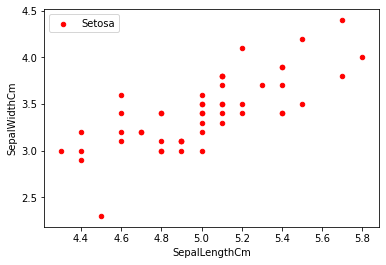

In [6]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='r', label='Setosa')

We will follow the same method with all the **three** species and plot them on the same figure to visualize the dependence of the sepal width and sepal length on the species

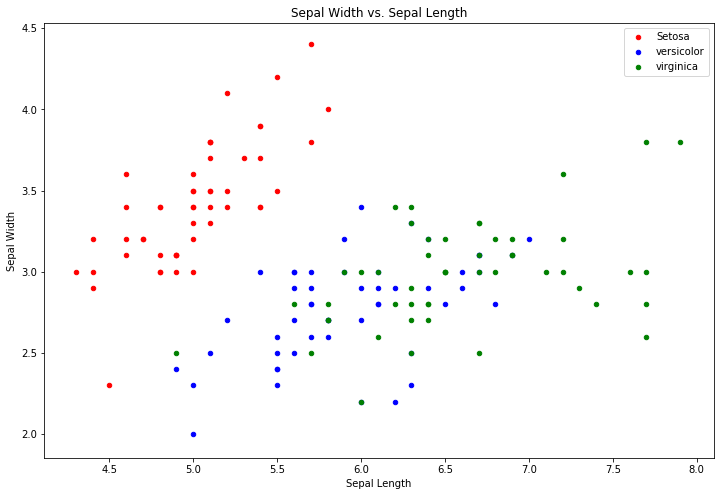

In [7]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='r', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Width vs. Sepal Length')

fig = plt.gcf() # gcf --> get current figure
fig.set_size_inches(12,8)
plt.show()

As can be seen from the figure above, we can't really separate the data points (species) by their sepal width and sepal length. Lets see what other property we may be able to use to segregate the species better:

In [8]:
data.head() #to check other feature we may be able to use

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The other features are petal length and petal width. Let us generate a figure similar to the one above using these two features instead of sepal length and width.

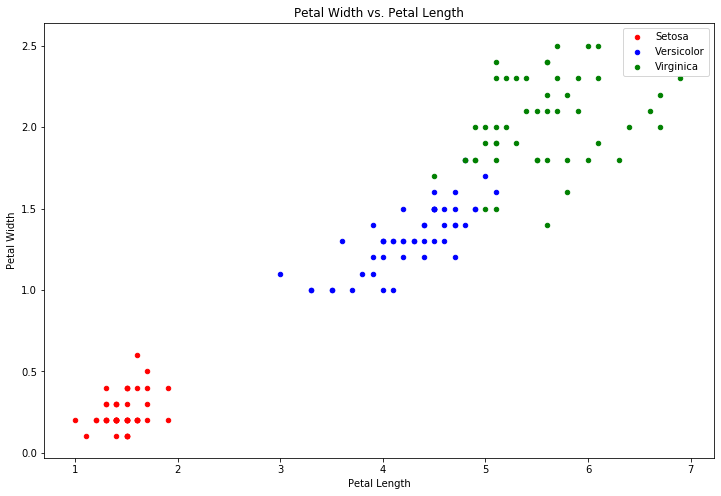

In [9]:
fig1 = data[data.Species == 'Iris-setosa'].plot(x = 'PetalLengthCm', y = 'PetalWidthCm', kind = 'scatter', color = 'r', label = 'Setosa')
data[data.Species == 'Iris-versicolor'].plot(x='PetalLengthCm', y='PetalWidthCm', kind='scatter', color='blue', label='Versicolor', ax=fig1)
data[data.Species == 'Iris-virginica'].plot(x='PetalLengthCm', y='PetalWidthCm', kind = 'scatter', color = 'green', label='Virginica', ax=fig1)

fig1.set_xlabel('Petal Length')
fig1.set_ylabel('Petal Width')
fig1.set_title('Petal Width vs. Petal Length')

fig1 = plt.gcf()
fig1.set_size_inches(12,8)
plt.show()

**Clearly**, the species can be better segregated using their petal lengths and widths as compared to their sepal lengths and widths. Therefore, we will chose these features for further analyses. But that will be in a little while. First, let's do some more exploring of the data.

### Let us now see the distribution of the petal and sepal lengths and widths

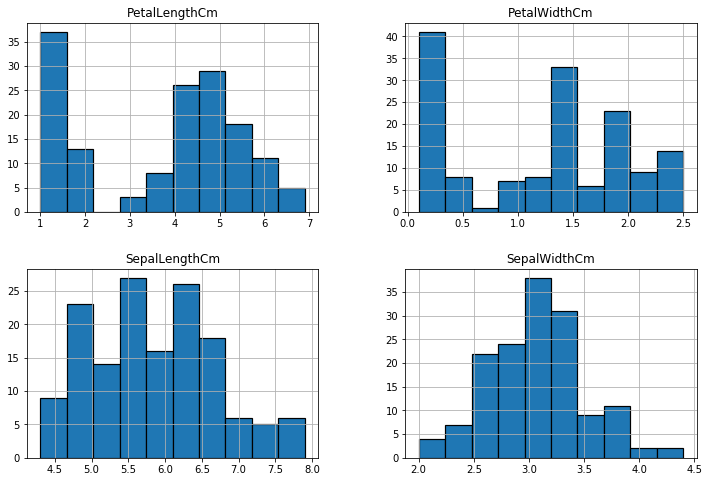

In [10]:
data.hist(edgecolor='black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,8)

### Visualize using a violinplot how the petal and sepal lengths and widths correlate to each of the species

A *violinplot* is a very useful tool in visualization. The thinner part of the plot shows that there is less density whereas the thicker part conveys higher density of data points. We will need to import some more functions.

In [11]:
import seaborn as sns
# Seaborn helps to plot a combination of boxplot and another type of plot (scatterplot, violinplot, etc.)
# sns is usually used when there is a possibility of multiple boxplots in the same figure.
from subprocess import check_output

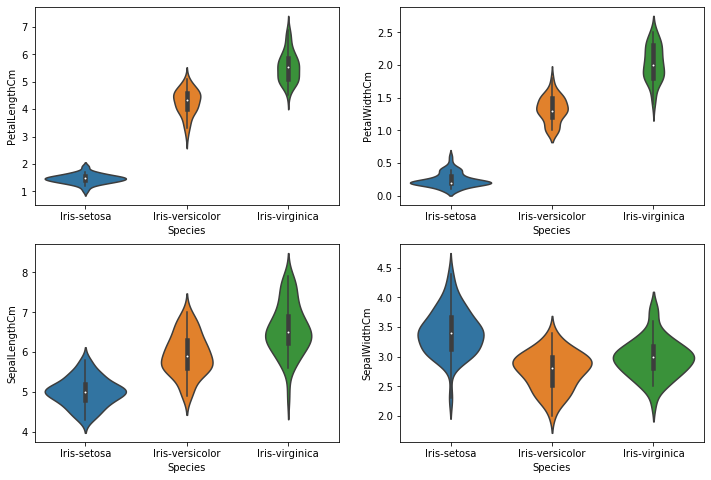

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1) #'subplot(no. of rows, no. of columns, index number)'
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

plt.show()

### The original problem that was given to us was a classification problem (*predicting the class based on the available attributes*). Thus, we will be using classification algorithms

#### We will use various types of classification types to check for the best one. But before that, we will import all the required packages

In [13]:
from sklearn.linear_model import LogisticRegression  # for the Logistic Regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  # for Support Vector Machine (SVM) Algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using Decision Tree Algoithm

It is imperative to note that *when we train any algorithm, the number of features and their correlation plays an important role*. **If many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy.**

Even though the number of features for this dataset is just 4, we will see which of them are highly correlated and which are not. This is help us with the training dataset.

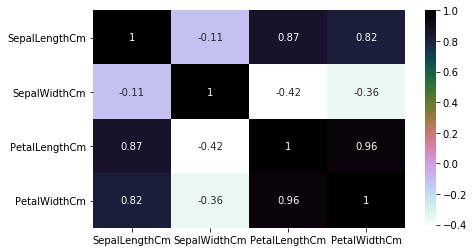

In [14]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(data.corr())
plt.show()

Higher correlation is ideal. From the above figure, it is evident that Petal length and Petal width are highly correlated (to each other - 1, 0.96). We have found our relevant features!

### Steps To Be followed When Applying an Algorithm:
1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

3. Then pass the training dataset to the algorithm to train it. We use the .fit() method

4. Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

5. We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting the data into training and testing sets

In [15]:
train, test = train_test_split(data, test_size = 0.3) # the data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


### Let's check the algorithms with ALL the features selected (*we will later revisit with selecting only the relevant features*).

In [16]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,5.8,2.7,5.1,1.9,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor


In [17]:
train_X = train[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train[['Species']]

# Now do the same with the test dataset as well

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test[['Species']]

In [18]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,5.8,2.7,5.1,1.9
57,4.9,2.4,3.3,1.0
36,5.5,3.5,1.3,0.2
79,5.7,2.6,3.5,1.0
52,6.9,3.1,4.9,1.5


In [19]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
138,6.0,3.0,4.8,1.8
33,5.5,4.2,1.4,0.2
46,5.1,3.8,1.6,0.2
127,6.1,3.0,4.9,1.8
86,6.7,3.1,4.7,1.5


In [20]:
test_y.head()

,Species
138,Iris-virginica
33,Iris-setosa
46,Iris-setosa
127,Iris-virginica
86,Iris-versicolor


### 1. Support Vector Machine (SVM)

An SVM can be used as a classifier to train your model in order to understand the patterns in the data so as to make a classification. After training, the module predicts the class **with a rather high accuracy**.

In [21]:
svm_model = svm.SVC()
svm_model.fit(train_X,train_y) # train the algorithm

svm_prediction = svm_model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(svm_prediction,test_y))
#now we check the accuracy of the algorithm. 


The accuracy of the SVM is: 0.9555555555555556


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The algorithm seems to be very accurate with an accuracy of 0.978. Let's see how the other algorithms react to our training and testing datasets and their accuracies.

### 2. Logistic Regression:

This is a classification algorithm, mainly used for categorical variables.

In [22]:
lr_model = LogisticRegression()
lr_model.fit(train_X,train_y)
lr_prediction=lr_model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(lr_prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3. Decision Tree

The training dataset is used to build a decision tree, which in turn is used for the prediction of a class.

In [23]:
dt_model=DecisionTreeClassifier()
dt_model.fit(train_X,train_y)
dt_prediction=dt_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


### 4. K-Nearest Neighbors (KNN)

KNN is used to determine the class of a variable using the classes of 'N' other 'known' variables which nearest to the particular variable.

In [24]:
knn_model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knn_model.fit(train_X,train_y)
knn_prediction=knn_model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(knn_prediction,test_y))

The accuracy of the KNN is 1.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


If we change the value of 'n' in the KNN classification, let us see how it will affect our algorithm:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-ve

([<matplotlib.axis.XTick at 0x7fabe426b1d0>,
 <a list of 10 Text xticklabel objects>)

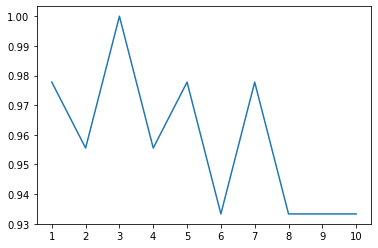

In [25]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

## Let's now check all the algorithms using just the petals and sepals separately:

In [26]:
petal = data[['PetalWidthCm','PetalLengthCm','Species']]
sepal = data[['SepalWidthCm', 'SepalLengthCm', 'Species']]

In [27]:
train_p, test_p = train_test_split(petal, test_size = 0.3, random_state=0)

train_p_X = train_p[['PetalWidthCm','PetalLengthCm']]
train_p_y = train_p[['Species']]

test_p_X = test_p[['PetalWidthCm','PetalLengthCm']]
test_p_y = test_p[['Species']]


# Repeat the same with the Sepal data set:

train_s, test_s = train_test_split(sepal, test_size = 0.3, random_state=0)

train_s_X = train_s[['SepalWidthCm','SepalLengthCm']]
train_s_y = train_s[['Species']]

test_s_X = test_s[['SepalWidthCm','SepalLengthCm']]
test_s_y = test_s[['Species']]


### 1. SVM:

In [28]:
svm_model1 = svm.SVC()
svm_model1.fit(train_p_X,train_p_y)
svm_prediction1 = svm_model1.predict(test_p_X)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(svm_prediction1,test_p_y))

# Follow the same steps with Sepals as well:

svm_model2 = svm.SVC()
svm_model2.fit(train_s_X,train_s_y)
svm_prediction2 = svm_model2.predict(test_s_X)
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(svm_prediction2,test_s_y))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Clearly, the predictions using Sepals is far worse compared to the predictions using Petals. Lets continue..

### 2. Logistic Regression

In [29]:
lr_model1 = LogisticRegression()
lr_model1.fit(train_p_X,train_p_y)
lr_prediction1 = lr_model1.predict(test_p_X)
print('The accuracy of Logistic Regression using Petals is:',metrics.accuracy_score(lr_prediction1,test_p_y))

lr_model2 = LogisticRegression()
lr_model2.fit(train_s_X,train_s_y)
lr_prediction2 = lr_model2.predict(test_s_X)
print('The accuracy of Logistic Regression using Sepals is:',metrics.accuracy_score(lr_prediction2,test_s_y))

The accuracy of Logistic Regression using Petals is: 0.9777777777777777
The accuracy of Logistic Regression using Sepals is: 0.8222222222222222


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3. Decision Trees:


In [30]:
dt_model1=DecisionTreeClassifier()
dt_model1.fit(train_p_X,train_p_y) 
dt_prediction1=dt_model1.predict(test_p_X) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(dt_prediction1,test_p_y))

dt_model2=DecisionTreeClassifier()
dt_model2.fit(train_s_X,train_s_y) 
dt_prediction2=dt_model2.predict(test_s_X) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(dt_prediction2,test_s_y))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


### 4. KNN:

In [31]:
knn_model1=KNeighborsClassifier(n_neighbors=3) 
knn_model1.fit(train_p_X,train_p_y) 
knn_prediction1=knn_model1.predict(test_p_X) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(knn_prediction1,test_p_y))

knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(train_s_X,train_s_y) 
knn_prediction2=knn_model2.predict(test_s_X) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(knn_prediction2,test_s_y))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
